## Prediction of Carbon Monoxide (CO) emession of a turbine using Multiple Linear Regression

### About this data
- This data was taken form UC Irvine Machine Learning Repository.
- This data was taken from a gas turbine located in Turkey for the purpose of studying gas emissions, namely CO and NOx.
- The dataset contains 11 sensor measures aggregated over one hour.

- Import library for Data processing and Data sisualization

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Import the Data from folder and convert it into pandas dataframe

In [15]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DATA SCIENCE PROJECT\\Project\\Gasturbine\gt_2015.csv")

- Ambient temperature (AT) (°C)
- Ambient pressure (AP) (mbar) 
- Ambient humidity (AH) (%) 
- Air filter difference pressure (AFDP) (mbar)
- Gas turbine exhaust pressure (GTEP) (mbar)
- Turbine inlet temperature (TIT) (°C)
- Turbine after temperature (TAT) (°C)
- Compressor discharge pressure (CDP) (mbar)
- Turbine energy yield (TEY) (MWH) 
- Carbon monoxide (CO) (mg/m3) 
- Nitrogen oxides (NOx) (mg/m3) 



In [16]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


- We drop the NOX because we only want to create a Carbon Monoxide prediction model only for this project

In [17]:
df=df.drop('NOX',axis=1)

- From descibe data we can see the Ambient Temperature is normal which is max of 37°C and min of -6°C. Same for other parameter which have min and max value within normal range.

In [18]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000


- Since there is no null for this data we do not have to remove or replace the NULL

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
dtypes: float64(10)
memory usage: 577.0 KB


- We use scatter plot to see all of the variable compared to outcome variable (CO emissions)

- From scatter plot below we can see that the data is full of outlier and we cannot see the definite trend relate all of the variable to CO emissions.
we can also see that the Carbon Monoxide data is skewed to the right.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


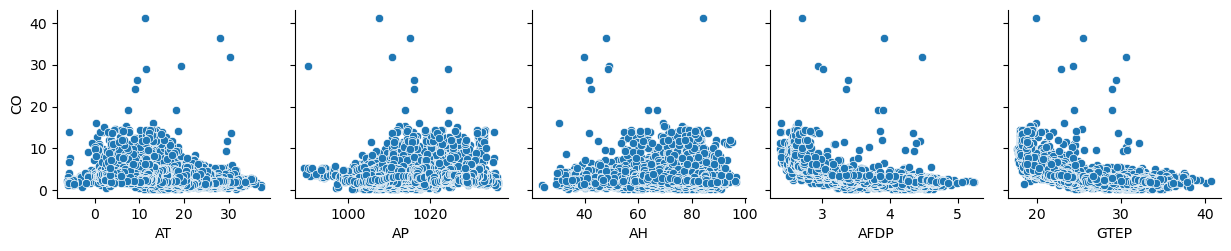

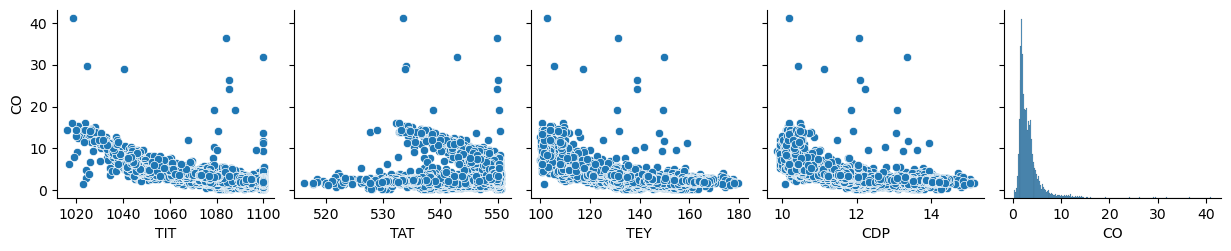

In [20]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['CO'])

- we can also use boxplot to see the outlier for all of the variable 

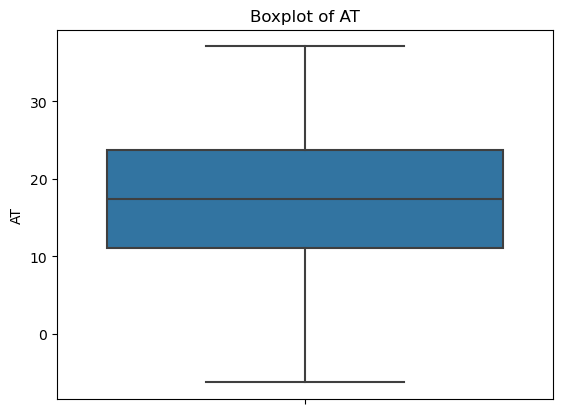

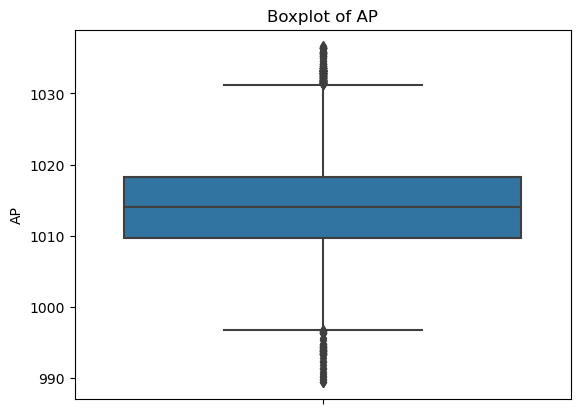

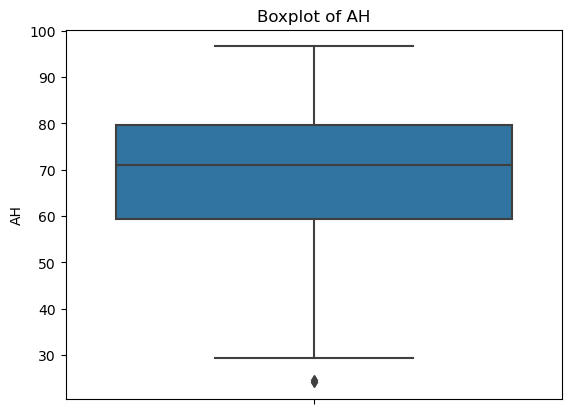

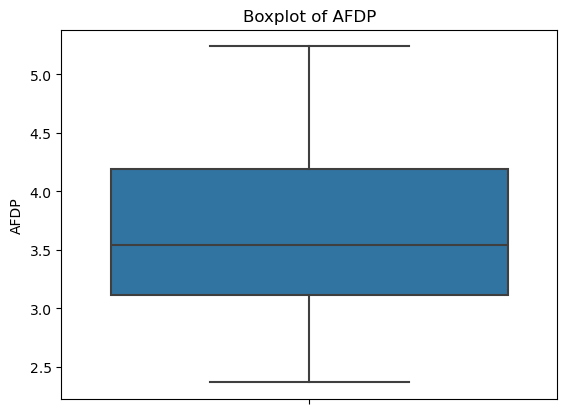

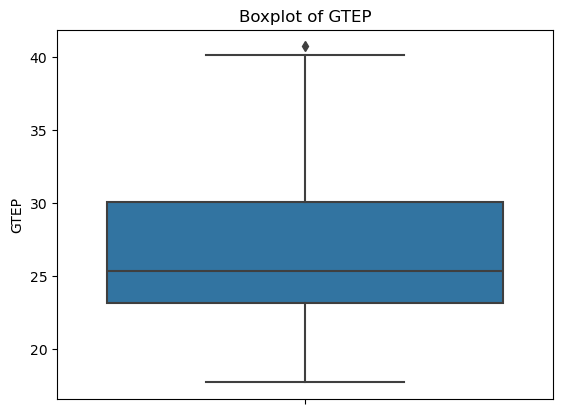

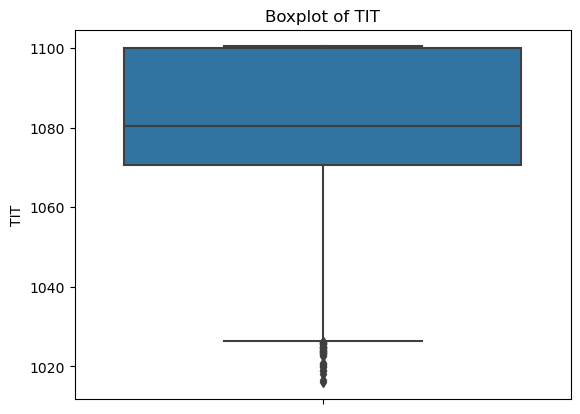

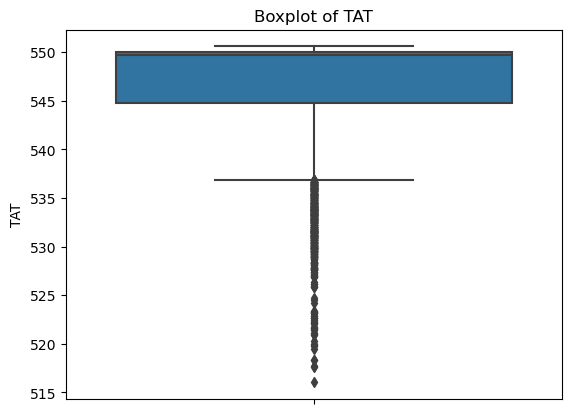

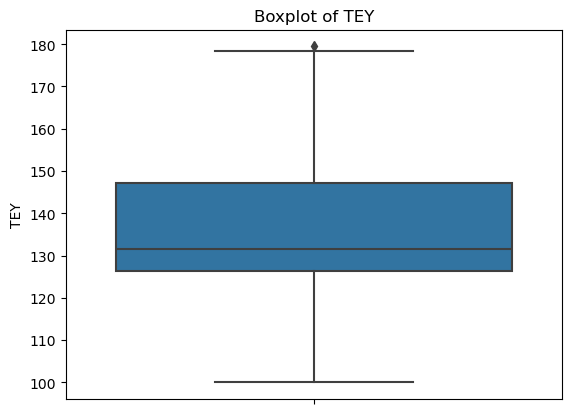

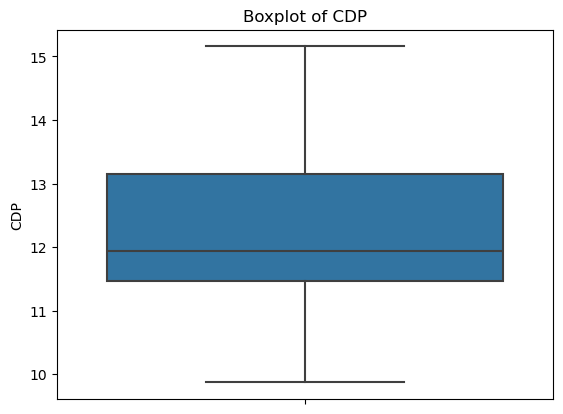

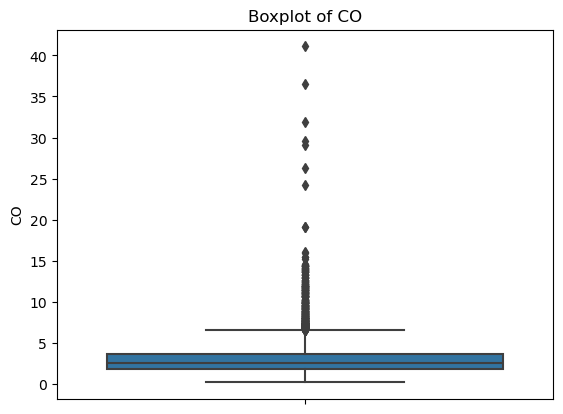

In [21]:
for col in df.columns:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- From the boxplot we can see that there is a lot of outliers for our target variable (Carbon Monoxide)

- Function below was used to remove the Outlier for every column including the Carbon monoxide

In [22]:
def remove_outliers_iqr(df):
    """Removes outliers using IQR for all numerical columns."""
    cleaned_df = df.copy()
    for col in cleaned_df.select_dtypes(include=['number']):  # Process only numeric columns
        Q1 = cleaned_df[col].quantile(0.25)  # First quartile
        Q3 = cleaned_df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Apply function
df_cleaned = remove_outliers_iqr(df)

print(df_cleaned)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
1     1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2     0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3     1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4     1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   
5     1.83190  1021.7  76.411  2.8410  23.495  1076.4  549.92  133.58  11.829   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
7363  3.67630  1030.0  88.243  4.2678  29.934  1099.9  541.39  157.19  13.517   
7364  8.52240  1029.9  88.374  2.9068  18.882  1037.7  543.23  108.10  10.423   
7377  3.42180  1028.7  91.003  3.6911  22.859  1073.5  549.78  129.86  11.549   
7378  3.37760  1028.5  92.703  3.3128  20.248  1057.6  550.30  117.46  10.783   
7382  5.88370  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   

          CO  
1     6.4684

- After removing the outliers we use scatter plot to see the trend of every variable compared to the outcome variable. As we can see below all the Ambient parameter like Ambient temperature, Ambient Pressure,Ambient Hummidity does not really have a vissible trend related to the Outcome variable (Carbon Monoxide Emissions).
- After removing The outliers we can see that Outcome variable (Carbon Monoxide Emissions) still skewed to the right but it is not as much as before.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


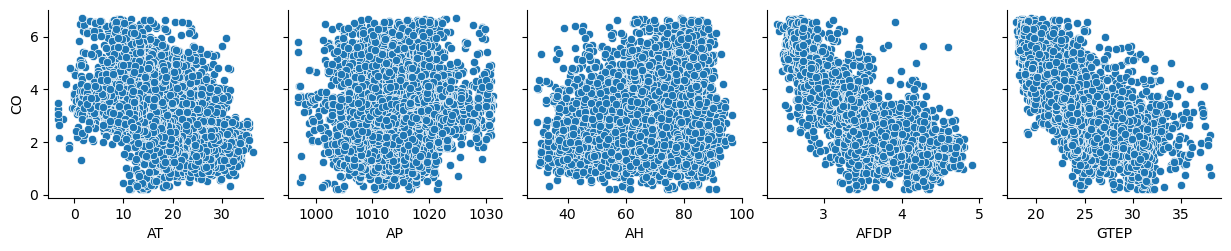

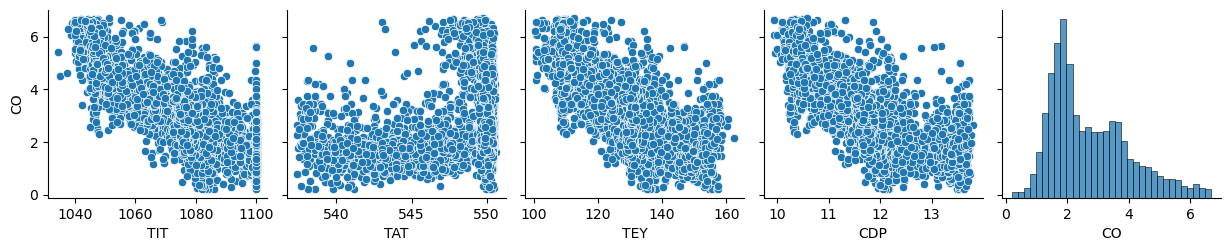

In [23]:
for i in range(0, len(df_cleaned.columns), 5):
    sns.pairplot(data=df_cleaned,
                x_vars=df.columns[i:i+5],
                y_vars=['CO'])

- As the Ambient temperature, Ambient Pressure,Ambient Hummidity and turbine after temeperature does not really have visable affect on the Carbon Monoxide Emissions

In [24]:
df_cleaned=df_cleaned.drop(['AT','AP','AH','TAT'],axis=1)

In [25]:
df_cleaned.head()

,AFDP,GTEP,TIT,TEY,CDP,CO
1,2.3937,18.584,1045.5,109.18,10.347,6.4684
2,2.7789,22.264,1068.8,125.88,11.256,3.6335
3,2.8170,23.358,1075.2,132.21,11.702,3.1972
4,2.8377,23.483,1076.2,133.58,11.737,2.3833
5,2.8410,23.495,1076.4,133.58,11.829,2.0812


- Below functions are used to see the linear correlations between the variables and the Outcome variable. To make it more vissable we can use Seaborn to plot a heatmap for the correlation.
- From the correlation we can see that all of the variable have a strong negative linear correlation with Carbon monoxide emissions.

In [26]:
corr=df_cleaned.corr()

In [27]:
corr

,AFDP,GTEP,TIT,TEY,CDP,CO
AFDP,1.000000,0.818583,0.911016,0.877516,0.925422,-0.790360
GTEP,0.818583,1.000000,0.902281,0.910181,0.916742,-0.681763
TIT,0.911016,0.902281,1.000000,0.982181,0.983423,-0.821935
TEY,0.877516,0.910181,0.982181,1.000000,0.988149,-0.763663
CDP,0.925422,0.916742,0.983423,0.988149,1.000000,-0.784659
CO,-0.790360,-0.681763,-0.821935,-0.763663,-0.784659,1.000000


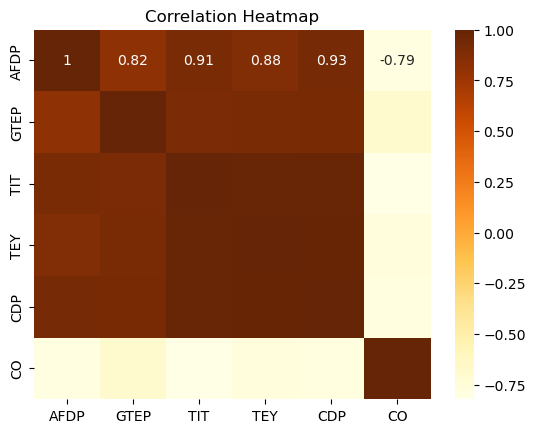

In [28]:
sns.heatmap(corr, annot=True, cmap='YlOrBr')
plt.title("Correlation Heatmap")
plt.show()

- Than we seperated the independent variable and the outcome variable into two dataframe X (independent variable) and y (outcome variable).
- We will use a train test split library from SKlearn to split the data into a test and train dataset which consist of 25% data for test and 75% data for training. 

In [29]:
X=df_cleaned[['AFDP','GTEP','TIT','TEY','CDP']]
y=df_cleaned['CO']

from sklearn.model_selection import train_test_split 
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25,shuffle=True) 

- Than we use the train dataset to train the dataset using a multiple linear regression model from SKlearn

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

- Than, we use the model that have been train to predict our test data set and plot it to see the scatter plot of the predicted value compared to the actual value
- We also put a perfect fit line which indicate that te predict value is equal to actual value

In [31]:
y_pred= lr.predict(X_test)

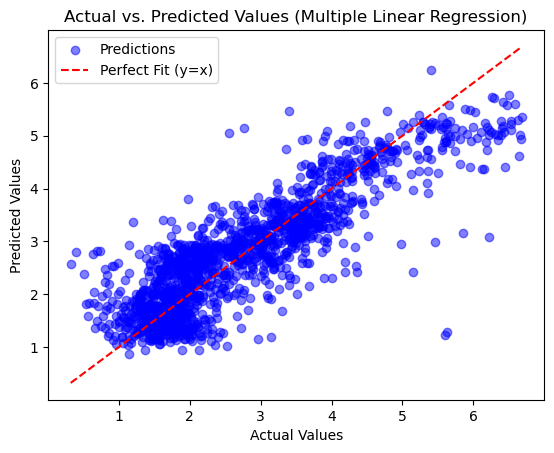

In [32]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Multiple Linear Regression)")
plt.legend()
plt.show()

- Below we can see the scatter plot off the pridicted values against the residuals.

In [33]:
residuals = y_test - y_pred

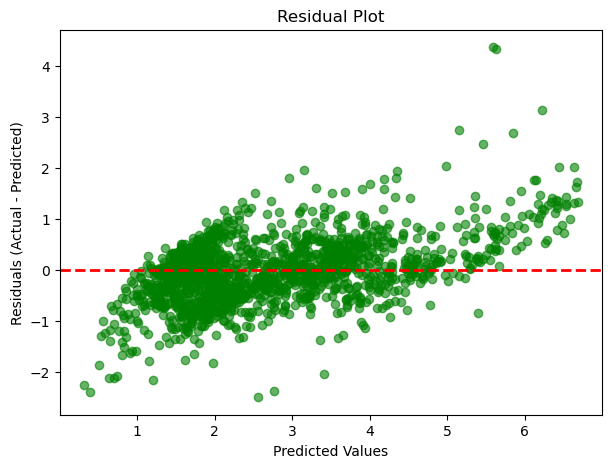

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, residuals, color="green", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# Validation
From the Sklearn library we use r square score which we gain 0.739 which is quite high. However A high R² does not mean one variable causes another.R² always increases when more predictors are added, even if they are irrelevant.

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test,y_pred))

0.7390164634597751


In [36]:
mse = mean_squared_error(y_test, y_pred)

For our Root mean squared error we got a value of 0.6537 which is quite high due to our predicted values ranginng from only 0.3238 to 6.679

In [37]:
print(f'MSE with random_state=42: {mse}')

MSE with random_state=42: 0.42732146804014737


In [38]:
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_rmse

0.6536983004721271

In [39]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 0.6537
